<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Modeling Walkthrough

_Authors: Riley Dallas (AUS)_

---

### Learning Objectives
*After this lesson, you will be able to:*

- Gather, clean, explore and model a dataset from scratch.
- Split data into testing and training sets using both train/test split and cross-validation and apply both techniques to score a model.
- Evaluate several models.


## Importing libaries
---

We'll need the following libraries for today's lesson:

1. `pandas`
2. `numpy`
3. `seaborn`
4. `matplotlib.pyplot`
4. `train_test_split` and `cross_val_score` from `sklearn`'s `model_selection` module
5. `LinearRegression`, `LassoCV` and `RidgeCV` from `sklearn`'s `linear_model` module
6. `StandardScaler` from `sklearn`'s `preprocessing` module
7. `r2_score` from `sklearn`'s `metrics` module 

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

## Load the Data

---

Today's [dataset](http://www-bcf.usc.edu/~gareth/ISL/data.html) (`College.csv`) is from the [ISLR website](http://www-bcf.usc.edu/~gareth/ISL/). 

Rename `Unnamed: 0` to `University`.

In [109]:
df = pd.read_csv('../datasets/College.csv')
df.rename(columns={'Unnamed: 0': 'University'}, inplace=True)
df.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Data cleaning: Initial check
---

Check the following in the cells below:
1. Do we have any null values?
2. Are any numerical columns being read in as `object`?

In [110]:
# Check for nulls
df.isnull().sum()

University     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [111]:
# Check column data types
df.dtypes

University      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD             object
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

## Data cleaning: Clean up `PhD` column
---

`PhD` is being read in as a string because some of the cells contain non-numerical values. In the cell below, replace any non-numerical values with `NaN`'s, and change the column datatype to float.

In [112]:
df.PhD = df.PhD.map(lambda phd: np.nan if phd == '?' else float(phd))

In [113]:
df.dtypes

University      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD            float64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [114]:
df.isnull().sum()

University      0
Private         0
Apps            0
Accept          0
Enroll          0
Top10perc       0
Top25perc       0
F.Undergrad     0
P.Undergrad     0
Outstate        0
Room.Board      0
Books           0
Personal        0
PhD            29
Terminal        0
S.F.Ratio       0
perc.alumni     0
Expend          0
Grad.Rate       0
dtype: int64

## Data cleaning: Drop `NaN`'s
---

Since there are a small percentage of null cells, let's go ahead and drop them.

In [115]:
# 500 rows cautious 
# cannot just drop 


In [116]:
df.shape

(777, 19)

In [117]:
# rows are dropped 

In [118]:
df.dropna(inplace=True)

In [119]:
df.shape

(748, 19)

## Feature engineering: Binarize `'Private'` column
---

In the cells below, convert the `Private` column into numerical values.

In [120]:
df['Private'].value_counts()

Yes    544
No     204
Name: Private, dtype: int64

In [121]:
# sklearn need numeric 

In [122]:
# pd.get_dummies() - its an overkill 

In [123]:
df['Private'] = df['Private'].map({'Yes': 1, 'No': 0})

In [124]:
df

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70.0,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29.0,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53.0,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92.0,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76.0,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60.0,60,21.0,14,4469,40
773,Xavier University,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73.0,75,13.3,31,9189,83
774,Xavier University of Louisiana,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67.0,75,14.4,20,8323,49
775,Yale University,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96.0,96,5.8,49,40386,99


## EDA: Plot a Heatmap of the Correlation Matrix
---

Heatmaps are an effective way to visually examine the correlational structure of your predictors. 

In [125]:
# wanna predict number of {applications} that univeristy will receive in any given year

# enroll and accept high correlation 

<AxesSubplot:>

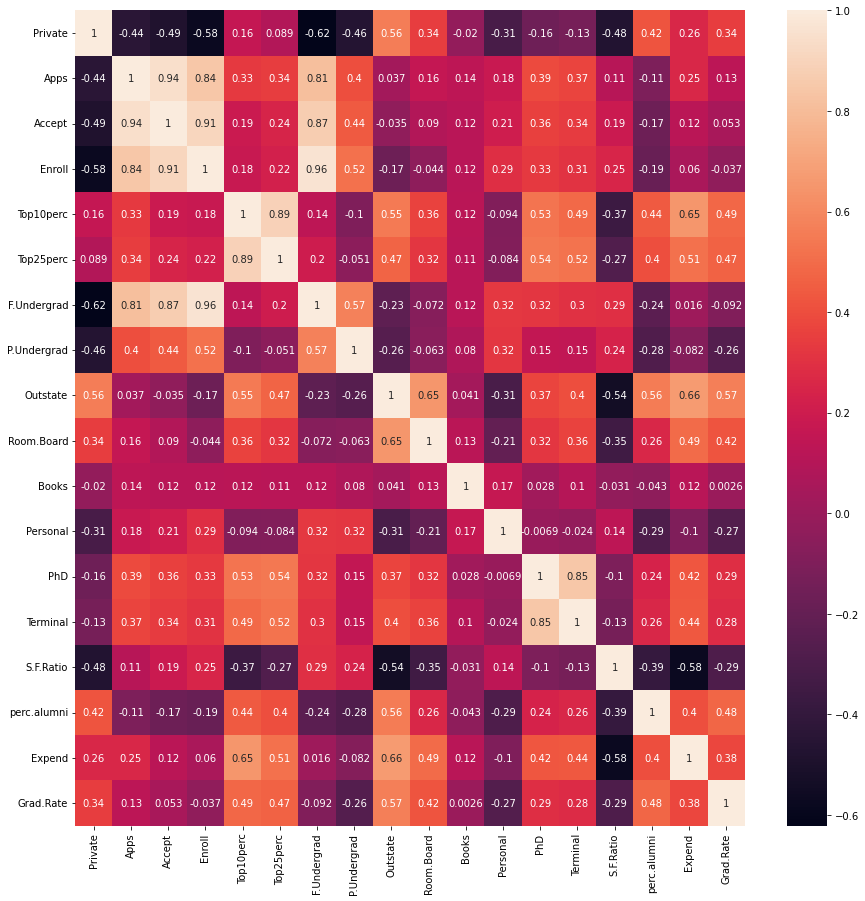

In [126]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

## EDA: Use seaborn's `.pairplot()` method to create scatterplots 
---

Let's create a pairplot to see how some of our stronger predictors correlate to our target (`Apps`). Instead of creating a pairplot of the entire DataFrame, we can use the `y_vars` and `x_vars` params to get a smaller subset.

In [127]:
df.corr()['Apps'].sort_values()

Private       -0.441434
perc.alumni   -0.105778
Outstate       0.036517
S.F.Ratio      0.109378
Grad.Rate      0.129846
Books          0.138333
Room.Board     0.162503
Personal       0.182639
Expend         0.252854
Top10perc      0.330712
Top25perc      0.344498
Terminal       0.368173
PhD            0.389312
P.Undergrad    0.400406
F.Undergrad    0.811162
Enroll         0.842801
Accept         0.943316
Apps           1.000000
Name: Apps, dtype: float64

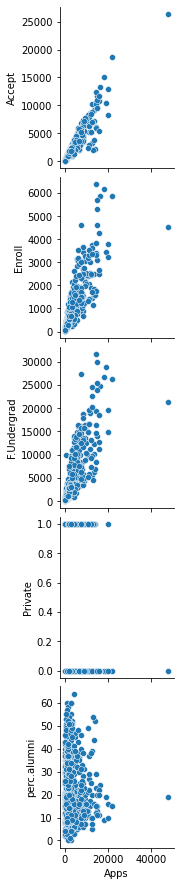

In [128]:
sns.pairplot(df, y_vars=['Accept', 'Enroll', 'F.Undergrad', 'Private', 'perc.alumni'], x_vars=['Apps'])

**outlier --> what happens if there are? 


## EDA: Create histograms of all numerical columns
---

usefull 

when p-undergrad 
- most of the values are goiung to be less than 2500 
- what could happen -> you have too much variation in one side but not on the other 
- binarise this variable -> low p undergrad and high p undergrad 

looking at apps histogram 
- skewed right -> what problem 
* normality assumptions need to check 
* linear regresion may not work well 
--> if strong skew, model could benefit from penalization 

two variables apps, accept, enroll, need to put into our model. 




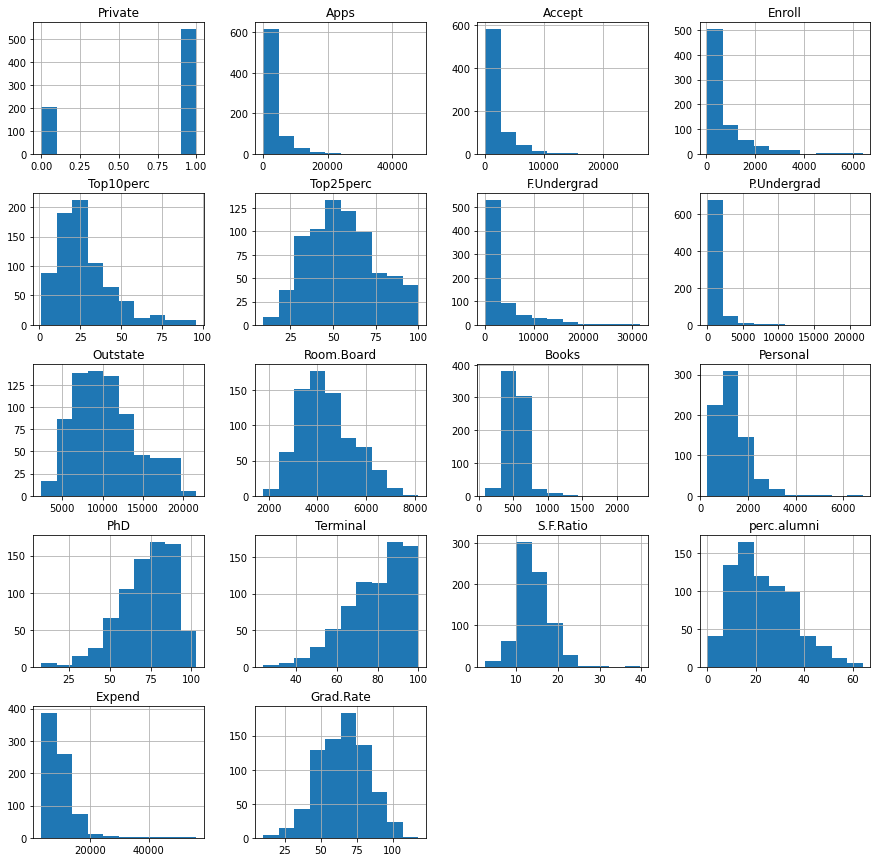

In [16]:
df.hist(figsize=(15, 15));

## EDA: Boxplots
---

In the cells below, create two boxplots:
1. One for our target (`Apps`)
2. And one for our strongest predictor (`Accept`)

<AxesSubplot:xlabel='Apps'>

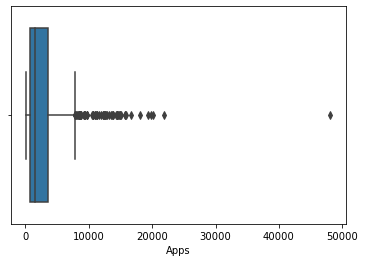

In [17]:
sns.boxplot(df['Apps'])

<AxesSubplot:xlabel='Accept'>

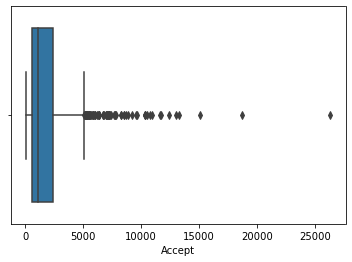

In [18]:
sns.boxplot(df['Accept'])

## Model Prep: Create our features matrix (`X`) and target vector (`y`)
---

Every **numerical** column (that is not our target) will be used as a feature.

The `Apps` column is our label: the number of applications received by that university.

In the cell below, create your `X` and `y` variables.

In [129]:
# maximal model
# foolist - why?
# 1) overfitting 
# 2) absent of common sense, attention to detail, industry knowledge. 
# maybe our predecessor left us a great data set, so it works. 



features = [col for col in df._get_numeric_data().columns if col != 'Apps']
X = df[features]
y = df['Apps']

## Model Prep: Train/test split
---

We always want to have a holdout set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Model Prep: Scaling
---

Since we're using `Lasso` and `Ridge`, we'll want to scale our features. In the cell below, fit a `StandardScaler` to `X_train` and use it to transform both `X_train` and `X_test`.

In [131]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Model Prep: Instantiate our models
---

We'll be evaluating `LinearRegression`, `LassoCV` and `RidgeCV`, so we'll need to create instances of all three models.

In [135]:
lr = LinearRegression()

In [136]:
lasso = LassoCV(n_alphas=200) # space out 200 alphas 

In [137]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [138]:
lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [140]:
lasso.alpha_

8.616542157402273

In [141]:
lasso.alphas_ 

# saw the biggest is 3148 - need to check the values close to the right or left

array([3.14881458e+03, 3.04138718e+03, 2.93762485e+03, 2.83740256e+03,
       2.74059954e+03, 2.64709912e+03, 2.55678863e+03, 2.46955924e+03,
       2.38530585e+03, 2.30392690e+03, 2.22532434e+03, 2.14940345e+03,
       2.07607274e+03, 2.00524383e+03, 1.93683137e+03, 1.87075293e+03,
       1.80692887e+03, 1.74528228e+03, 1.68573888e+03, 1.62822690e+03,
       1.57267705e+03, 1.51902238e+03, 1.46719824e+03, 1.41714216e+03,
       1.36879384e+03, 1.32209501e+03, 1.27698939e+03, 1.23342263e+03,
       1.19134222e+03, 1.15069747e+03, 1.11143938e+03, 1.07352065e+03,
       1.03689559e+03, 1.00152006e+03, 9.67351420e+02, 9.34348508e+02,
       9.02471550e+02, 8.71682130e+02, 8.41943146e+02, 8.13218761e+02,
       7.85474358e+02, 7.58676506e+02, 7.32792909e+02, 7.07792378e+02,
       6.83644784e+02, 6.60321028e+02, 6.37793004e+02, 6.16033563e+02,
       5.95016484e+02, 5.74716440e+02, 5.55108968e+02, 5.36170439e+02,
       5.17878033e+02, 5.00209704e+02, 4.83144162e+02, 4.66660840e+02,
      

In [142]:
lasso.alpha_

8.616542157402273

In [143]:
ridge.alpha_

3.7

In [154]:
lasso_best = Lasso(alpha = 8.616542157402273)

In [155]:
ridge_best = Ridge(alpha = 3.7)

In [156]:
print(ridge.alpha_)
print(lasso.alpha_)

3.7
8.616542157402273


## Cross validation
---

Use `cross_val_score` to evaluate all three models.

In [157]:
- cross_val_score(
    lr,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

987259.1698979352

In [158]:
- cross_val_score(
    lasso_best,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

956817.2653510487

In [159]:
- cross_val_score(
    ridge_best,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

983901.273873779

In [160]:
### NOT NEEDED DONT USE CROSS VAL SCORE 

In [161]:
# lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
# lr_scores.mean()

# lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
# lasso_scores.mean()

# ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
# ridge_scores.mean()

## Model Fitting and Evaluation
---

`RidgeCV` seems to be doing the best, so let's move forward with that model. Fit the model to the training data, and evaluate the training and test scores below.

In [162]:
# need to fit back again 

lasso_best.fit(X_train, y_train)

Lasso(alpha=8.616542157402273)

In [163]:
mean_squared_error(
    y_test,
    lasso_best.predict(X_test)
)

2217660.4602770316

In [164]:
# overfitted 

2217660.4602770316 > 983901.273873779

True

In [168]:
pd.Series(lasso_best.coef_, index = features).sort_values(ascending = False)

Accept         2738.978425
Top10perc       645.956351
Expend          415.737223
Room.Board      175.841587
F.Undergrad     151.309501
Grad.Rate        95.487208
S.F.Ratio        63.508043
P.Undergrad      59.648195
Books             4.284150
Personal          2.192009
Enroll           -0.000000
perc.alumni     -22.523054
Terminal        -30.482546
PhD             -75.639564
Top25perc      -172.106417
Private        -181.417795
Outstate       -250.745821
dtype: float64

<AxesSubplot:>

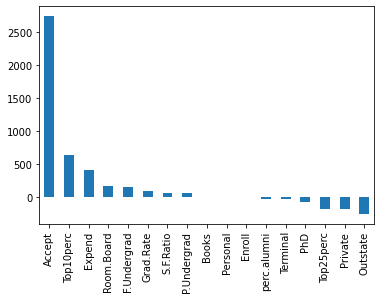

In [170]:
# hwo to plot the series 

pd.Series(lasso_best.coef_, index = features).sort_values(ascending = False).plot.bar()

In [87]:
# ridge.score(X_train, y_train)

# ridge.score(X_test, y_test)

# ridge_scores.mean()

# pred = ridge.predict(X_test)

# r2_score(y_test, pred)

# pd.Series(ridge.coef_, index=features).plot.bar(figsize=(15, 7))


In [105]:
predictions = lasso_best.predict(X_test)

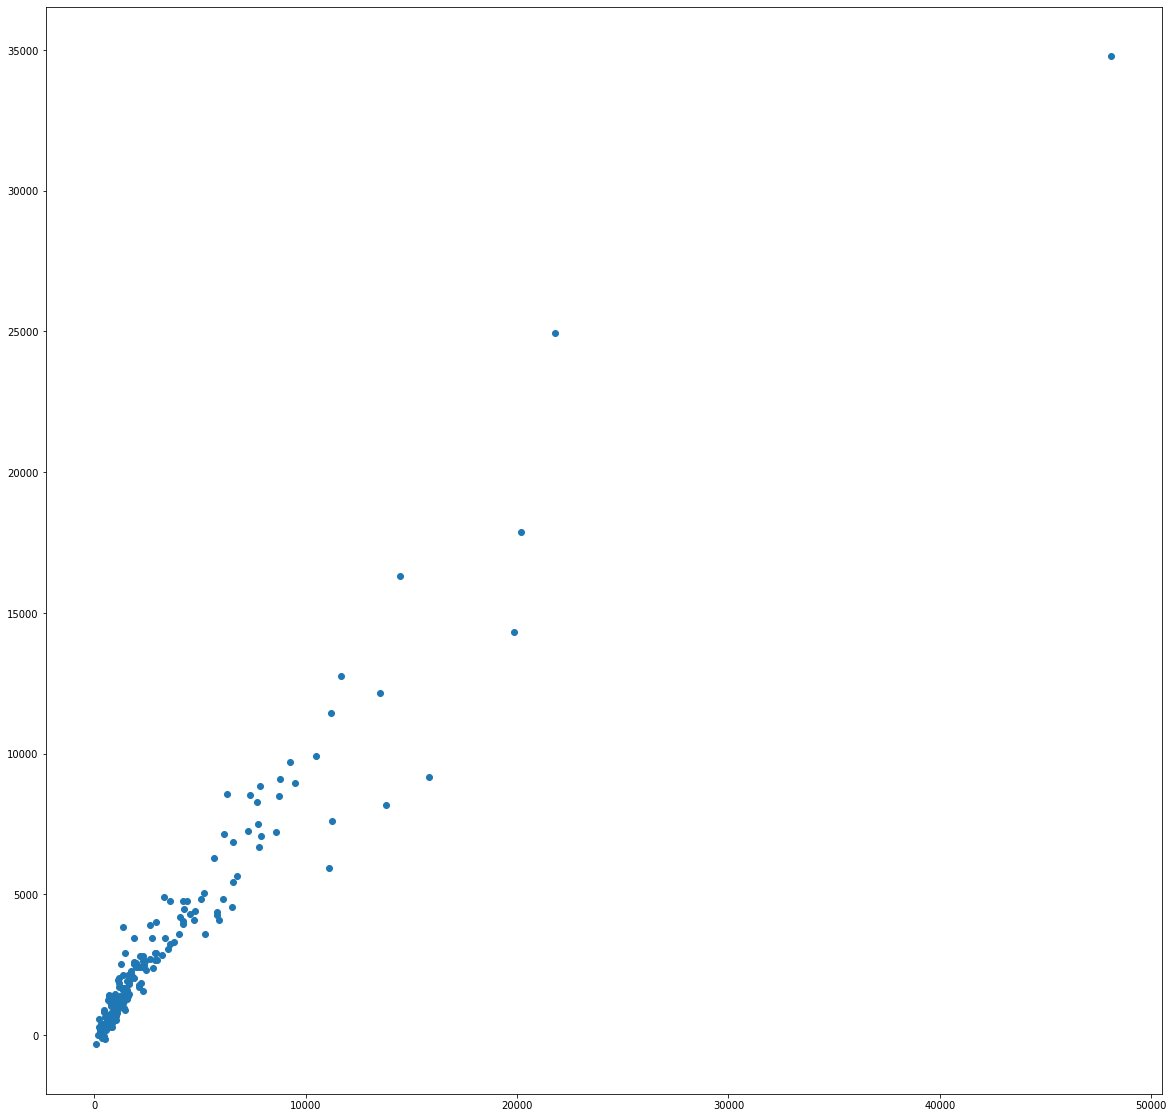

In [175]:
plt.figure(figsize=(20,20))
plt.scatter(x = y_test, y = predictions)


**error analysis 

**after u finish your model, you zoom into the points 

-> you did reall bad on and then you ask: why ??
